In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn

from IPython.display import display

%matplotlib inline

First, let's load the data and check if it's working.

In [2]:
data = pd.read_csv('data/noshows.csv')

In [3]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Great! Now let's do some data analysis!

Starting with the PatientId, I'm wondering if some patients have come more than once.

In [4]:
print(data.PatientId.value_counts())

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
7.579746e+13    62
8.713749e+14    62
6.264199e+12    62
6.684488e+13    57
8.722785e+11    55
8.923969e+13    54
8.435224e+09    51
8.534397e+14    50
1.447997e+13    46
6.543360e+13    46
8.189452e+13    42
9.452745e+12    42
1.882323e+14    40
9.496197e+12    38
2.271580e+12    38
1.336493e+13    37
1.484143e+12    35
8.883500e+13    34
9.861628e+14    34
7.124589e+14    33
4.167557e+14    30
6.128878e+12    30
8.121397e+13    29
8.634164e+12    24
3.699499e+13    23
                ..
6.375629e+12     1
9.369127e+12     1
5.375556e+14     1
1.662184e+11     1
7.234615e+13     1
9.649990e+12     1
6.912783e+10     1
1.954265e+13     1
2.736377e+10     1
5.532694e+11     1
7.149583e+12     1
8.676752e+13     1
7.838359e+13     1
5.962625e+11     1
4.919862e+13     1
3.477350e+14     1
1.626595e+13     1
7.794917e+12     1
1.161950e+13     1
5.615364e+14     1
4.355592e+11     1
1.321328e+12

We have some frequent patients. I guess that the probabillity they won't show would be lower.

In [5]:
print(data.loc[data['PatientId'] == 8.841186e+12])

Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []


The Id's looked a bit strange. Seems like there are not really unique. I'll get rid of them. Using the ScheduledDay I could've have seen if a patient has made a second appoitment after missing his first one.

Moving on. AppointmentID is just an index.

In [6]:
data['No-show'] = data['No-show'].map({'Yes': 1, 'No': 0})

In [7]:
from sklearn.model_selection import train_test_split

train_no_sale_price = data.drop(labels=['No-show'], axis=1)
train_sale_price = data['No-show']

x_train, x_test, y_train, y_test = train_test_split(train_no_sale_price, 
                                                    train_sale_price, 
                                                    test_size=0.3,
                                                    random_state=4)

In [8]:
for df in [x_train, x_test, y_train, y_test]:
    print(df.shape)

(77368, 13)
(33159, 13)
(77368,)
(33159,)


Let's get a base model going and then we'll add more features.

In [9]:
numeric_column_names = x_train.describe().columns
print(numeric_column_names)

Index(['PatientId', 'AppointmentID', 'Age', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received'],
      dtype='object')


In [10]:
x_train[numeric_column_names].head()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
108006,5.439367e+14,5766144,56,0,1,0,0,0,0
52643,7.462431e+14,5693899,23,0,0,0,0,0,0
30911,8.343467e+13,5644786,50,0,1,0,0,0,0
62619,2.515276e+13,5688028,41,0,0,0,0,0,0
58034,1.384643e+11,5746812,1,0,0,0,0,0,0


In [11]:
basic_columns = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(x_train[basic_columns], y_train)
print("train score:", model.score(x_train[basic_columns], y_train))
print("test score: ", model.score(x_test[basic_columns], y_test))

train score: 0.7974356323027608
test score:  0.7995416025815012


In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(x_test[basic_columns]))

array([[26512,     0],
       [ 6647,     0]], dtype=int64)

We have a problem because there are more samples of showing up and our model predicts the same value for all. We can use "class_weight" setting which means that the penalties for false predictions in the loss function will be weighted with inverse proportions to the frequencies of the classes. 

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight = 'balanced').fit(x_train[basic_columns], y_train)
print("train score:", model.score(x_train[basic_columns], y_train))
print("test score: ", model.score(x_test[basic_columns], y_test))

train score: 0.6344612759797332
test score:  0.6423896981211737


In [15]:
confusion_matrix(y_test, model.predict(x_test[basic_columns]))

array([[18166,  8346],
       [ 3512,  3135]], dtype=int64)

Ramdon forsest gives a bit better result, not entirely all negatives. But I'll keep on basing my model on logistic regression.

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=4).fit(x_train[basic_columns], y_train)
print("train score:", model.score(x_train[basic_columns], y_train))
print("test score: ", model.score(x_test[basic_columns], y_test))

train score: 0.7999560541826078
test score:  0.7969781959648964


In [17]:
confusion_matrix(y_test, model.predict(x_test[basic_columns]))

array([[26334,   178],
       [ 6554,    93]], dtype=int64)

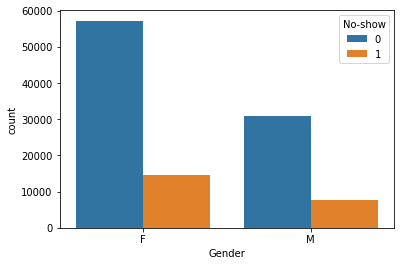

In [18]:
sns.countplot('Gender', hue='No-show', data=data);

There are quite a lot more women going with a bit higher rate of not showing up. Let's put that data as well.

In [19]:
data['IsMale'] = data['Gender'].map({'M': 1, 'F': 0})

In [20]:
from sklearn.model_selection import train_test_split

train_no_sale_price = data.drop(labels=['No-show'], axis=1)
train_sale_price = data['No-show']

x_train, x_test, y_train, y_test = train_test_split(train_no_sale_price, 
                                                    train_sale_price, 
                                                    test_size=0.3,
                                                    random_state=4)

basic_columns = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'IsMale']

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight = 'balanced').fit(x_train[basic_columns], y_train)
print("train score:", model.score(x_train[basic_columns], y_train))
print("test score: ", model.score(x_test[basic_columns], y_test))

train score: 0.6345129769413711
test score:  0.6423896981211737


Let's see what can we extract from schedule and appointment time.

In [21]:
from datetime import datetime

data['scheduled'] = data['ScheduledDay'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))
data['appointment'] = data['AppointmentDay'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))
data['diff_time'] =  (data['appointment'] - data['scheduled']).dt.days
data['hour'] = data['scheduled'].dt.hour
data['weekday'] = data['scheduled'].dt.weekday
data['diff_time'] = [0 if i < 0 else i for i in data['diff_time']]

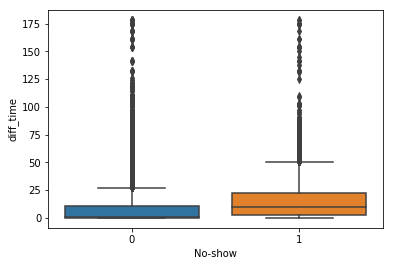

In [22]:
sns.boxplot(x="No-show", y="diff_time", data=data)

In [23]:
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,IsMale,scheduled,appointment,diff_time,hour,weekday
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,2016-04-29 18:38:08,2016-04-29,0,18,4
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,1,2016-04-29 16:08:27,2016-04-29,0,16,4
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,2016-04-29 16:19:04,2016-04-29,0,16,4
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,2016-04-29 17:29:31,2016-04-29,0,17,4
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,2016-04-29 16:07:23,2016-04-29,0,16,4
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,0,0,2016-04-27 08:36:51,2016-04-29,1,8,2
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,1,0,2016-04-27 15:05:12,2016-04-29,1,15,2
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,1,0,2016-04-27 15:39:58,2016-04-29,1,15,2
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,0,0,2016-04-29 08:02:16,2016-04-29,0,8,4
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,0,0,2016-04-27 12:48:25,2016-04-29,1,12,2


In [24]:
print(data.diff_time.value_counts())

0      43781
1       6725
3       5290
6       4906
5       4037
4       3277
13      2913
2       2737
7       2332
20      1861
27      1706
12      1682
8       1605
14      1503
9       1391
19      1187
21      1173
15      1151
11      1115
16      1107
28      1089
18      1044
17      1021
26      1013
10       987
34       963
22       822
33       808
25       731
29       704
       ...  
108        5
107        5
110        5
94         5
97         5
102        5
111        5
101        4
104        4
95         4
118        4
121        3
91         3
114        2
96         2
93         2
92         2
106        2
109        2
81         1
116        1
150        1
125        1
100        1
126        1
122        1
124        1
138        1
145        1
131        1
Name: diff_time, Length: 128, dtype: int64


In [25]:
def TimeSpanToCategory( timeSpan ):
    if (timeSpan == 0) : return 1
    if ((timeSpan > 0) & (timeSpan < 4)) : return 2
    if ((timeSpan > 3) & (timeSpan < 8)) : return 3
    if ((timeSpan > 7) & (timeSpan < 31)) : return 4
    return 5

In [26]:
TimeSpanToCategory(12)

4

Wanted to use this slick function for each row.

In [27]:
data["TimeSpanCategory"] = TimeSpanToCategory(data['diff_time'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

I lost 2 hours trying to make it work. I'll do it this 4 times slower way.

In [28]:
data['TimeSpanCategory'] = [1 if i < 1 else i for i in data['diff_time']]
data['TimeSpanCategory'] = [2 if i > 1 and i <= 7 else i for i in data['TimeSpanCategory']]
data['TimeSpanCategory'] = [3 if i > 7 and i <= 30 else i for i in data['TimeSpanCategory']]
data['TimeSpanCategory'] = [4 if i > 30 else i for i in data['TimeSpanCategory']]

In [29]:
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Handcap,SMS_received,No-show,IsMale,scheduled,appointment,diff_time,hour,weekday,TimeSpanCategory
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,...,0,0,0,0,2016-04-29 18:38:08,2016-04-29,0,18,4,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,...,0,0,0,1,2016-04-29 16:08:27,2016-04-29,0,16,4,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,...,0,0,0,0,2016-04-29 16:19:04,2016-04-29,0,16,4,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,...,0,0,0,0,2016-04-29 17:29:31,2016-04-29,0,17,4,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,...,0,0,0,0,2016-04-29 16:07:23,2016-04-29,0,16,4,1
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,...,0,0,0,0,2016-04-27 08:36:51,2016-04-29,1,8,2,1
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,...,0,0,1,0,2016-04-27 15:05:12,2016-04-29,1,15,2,1
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,...,0,0,1,0,2016-04-27 15:39:58,2016-04-29,1,15,2,1
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,...,0,0,0,0,2016-04-29 08:02:16,2016-04-29,0,8,4,1
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,...,0,0,0,0,2016-04-27 12:48:25,2016-04-29,1,12,2,1


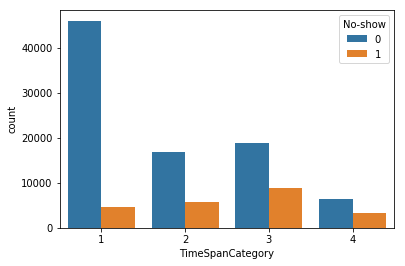

In [30]:
sns.countplot(x="TimeSpanCategory", hue = "No-show", data=data)

In [31]:
from sklearn.model_selection import train_test_split

train_no_sale_price = data.drop(labels=['No-show'], axis=1)
train_sale_price = data['No-show']

x_train, x_test, y_train, y_test = train_test_split(train_no_sale_price, 
                                                    train_sale_price, 
                                                    test_size=0.3,
                                                    random_state=4)

basic_columns = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'IsMale', 'TimeSpanCategory']

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight = 'balanced').fit(x_train[basic_columns], y_train)
print("train score:", model.score(x_train[basic_columns], y_train))
print("test score: ", model.score(x_test[basic_columns], y_test))

train score: 0.652983145486506
test score:  0.6587351850176423


Wo-hoo got 0.02 more!

In [32]:
data['area'] = pd.factorize(data['Neighbourhood'])[0]

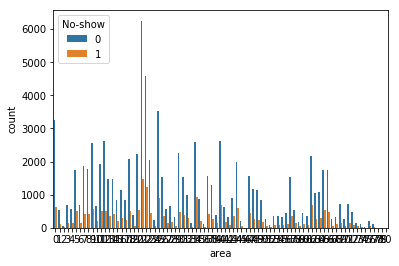

In [33]:
sns.countplot(x="area", hue = "No-show", data=data)

In [34]:
from sklearn.model_selection import train_test_split

train_no_sale_price = data.drop(labels=['No-show'], axis=1)
train_sale_price = data['No-show']

x_train, x_test, y_train, y_test = train_test_split(train_no_sale_price, 
                                                    train_sale_price, 
                                                    test_size=0.3,
                                                    random_state=4)

basic_columns = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'IsMale',
                 'TimeSpanCategory', 'area']

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight = 'balanced').fit(x_train[basic_columns], y_train)
print("train score:", model.score(x_train[basic_columns], y_train))
print("test score: ", model.score(x_test[basic_columns], y_test))

train score: 0.6528021921207734
test score:  0.6581018727947163
